<a href="https://colab.research.google.com/github/subarno1/python/blob/main/Unit%203%20Covid%20Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# COVID 19 Data Analysis

# Task 1 : Environment Set up

Import all required libraries that are needed for data analysis

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style 
%matplotlib inline
import seaborn as sns

# Task 2 :  Data Collection

Use nytimes github repository as a data source to collect the covid 19 data in real time and ingest it into colab notebook for data anlysis purpose

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-states.csv')

In [ ]:
df.head()

,date,state,fips,cases,deaths
0,2020-01-21,Washington,53,1,0
1,2020-01-22,Washington,53,1,0
2,2020-01-23,Washington,53,1,0
3,2020-01-24,Illinois,17,1,0
4,2020-01-24,Washington,53,1,0


In [ ]:
type(df)

pandas.core.frame.DataFrame

In [ ]:
df.shape

(48838, 5)

In [ ]:
df.columns

Index(['date', 'state', 'fips', 'cases', 'deaths'], dtype='object')

Text(0, 0.5, 'Deaths')

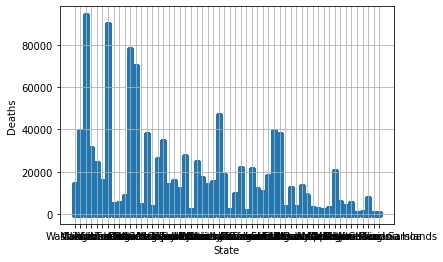

In [ ]:
plt.scatter(df['state'],df['deaths'])
plt.grid()
plt.xlabel("State")
plt.ylabel("Deaths")


Text(0, 0.5, 'Deaths')

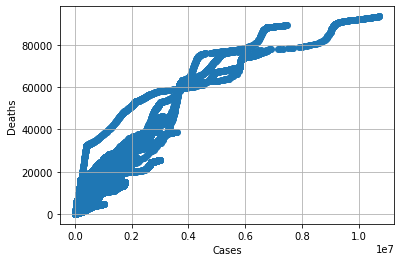

In [ ]:
plt.scatter(df['cases'],df['deaths'])
plt.grid()
plt.xlabel("Cases")
plt.ylabel("Deaths")

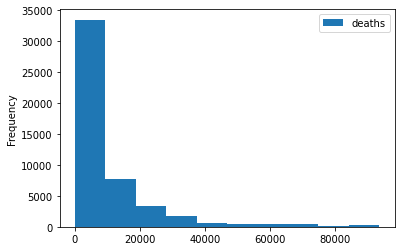

In [ ]:
df.plot(x='cases', y= 'deaths', kind = 'hist', bins=10)

# Task 3 : Data Wrangling and EDA (Exploratory Data Analysis)

Analyzing New York state data for Covid 19

In [ ]:
ny_df = df[df['state']=='New York']

In [ ]:
ny_df.head()

,date,state,fips,cases,deaths
246,2020-03-01,New York,36,1,0
261,2020-03-02,New York,36,1,0
276,2020-03-03,New York,36,2,0
293,2020-03-04,New York,36,11,0
313,2020-03-05,New York,36,22,0


In [ ]:
ny_df.shape

(884, 5)

In [ ]:
ny_df.tail()

,date,state,fips,cases,deaths
48592,2022-07-28,New York,36,5793691,69564
48648,2022-07-29,New York,36,5796900,69576
48704,2022-07-30,New York,36,5799922,69576
48760,2022-07-31,New York,36,5802579,69576
48816,2022-08-01,New York,36,5821036,69628


In [ ]:
#first death in NY
first_ny_death = ny_df[ny_df['deaths']!=0]
first_ny_death.head()

,date,state,fips,cases,deaths
669,2020-03-14,New York,36,610,2
722,2020-03-15,New York,36,732,6
775,2020-03-16,New York,36,950,10
828,2020-03-17,New York,36,1375,18
882,2020-03-18,New York,36,2387,32


In [ ]:
#total number of cases
ny_df['cases'].max()

5821036

In [ ]:
# not a correct way of calculating total count bcoz data is cumulative
ny_df['cases'].sum()

1990680884

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ff71454a6d0>,
      dtype=object)

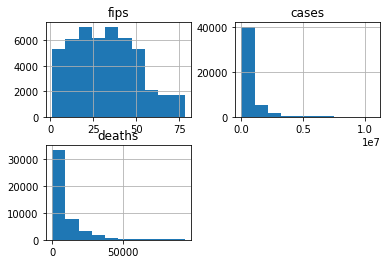

In [ ]:
df.hist()

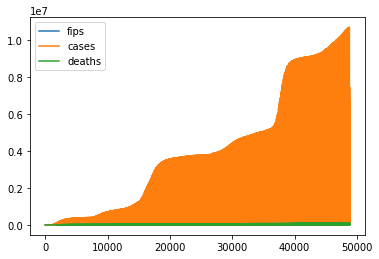

In [ ]:
df.plot()

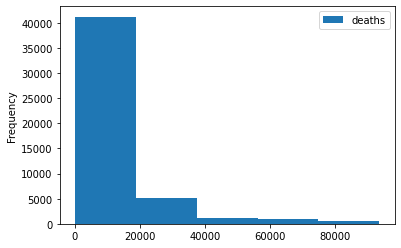

In [ ]:
df.plot(x='cases', y= 'deaths', kind = 'hist', bins=5)

Finding new covid 19 cases on daily basis (new cases added everyday)

In [ ]:
#new cases for NY
# type(ny_df['cases'])

newcase = []
previuos_case = 0
for index, row in ny_df.iterrows():
  current_case = row['cases']
  newcase_count = current_case - previuos_case
  previuos_case = current_case
  newcase.append(newcase_count)
  # print(newcase_count)

In [ ]:
ny_df['new_cases'] = newcase

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
newcase

[1,
 0,
 1,
 9,
 11,
 22,
 45,
 17,
 36,
 31,
 44,
 109,
 95,
 189,
 122,
 218,
 425,
 1012,
 1774,
 2952,
 3258,
 4817,
 5711,
 4805,
 7413,
 5941,
 5688,
 8771,
 6266,
 7721,
 8707,
 8153,
 8996,
 10329,
 12274,
 8122,
 9304,
 8314,
 9568,
 10765,
 10794,
 10160,
 8435,
 6548,
 7402,
 11755,
 8631,
 7532,
 7249,
 6199,
 4867,
 4324,
 5659,
 6341,
 8286,
 10683,
 6013,
 4077,
 3285,
 4718,
 4702,
 3879,
 4559,
 3699,
 2524,
 2302,
 2746,
 3526,
 2873,
 2715,
 2138,
 1610,
 1438,
 2123,
 2364,
 2759,
 2185,
 1901,
 1241,
 1479,
 1478,
 2078,
 1678,
 1754,
 1601,
 1279,
 1044,
 1132,
 1758,
 1549,
 1363,
 1104,
 945,
 1361,
 1043,
 1053,
 1042,
 1083,
 777,
 712,
 690,
 664,
 724,
 821,
 912,
 694,
 623,
 630,
 561,
 626,
 794,
 707,
 665,
 555,
 598,
 575,
 738,
 804,
 697,
 624,
 391,
 458,
 628,
 872,
 919,
 725,
 536,
 516,
 590,
 691,
 588,
 790,
 727,
 679,
 559,
 913,
 834,
 767,
 778,
 752,
 509,
 519,
 855,
 706,
 810,
 758,
 748,
 532,
 613,
 535,
 711,
 779,
 642,
 754,
 531,

In [ ]:
ny_df.head(10)

,date,state,fips,cases,deaths,new_cases
246,2020-03-01,New York,36,1,0,1
261,2020-03-02,New York,36,1,0,0
276,2020-03-03,New York,36,2,0,1
293,2020-03-04,New York,36,11,0,9
313,2020-03-05,New York,36,22,0,11
338,2020-03-06,New York,36,44,0,22
369,2020-03-07,New York,36,89,0,45
404,2020-03-08,New York,36,106,0,17
440,2020-03-09,New York,36,142,0,36
478,2020-03-10,New York,36,173,0,31


In [ ]:
ny_df['new_cases'].sum()

5821036

In [ ]:
ny_cases = ny_df['cases']
ny_deaths = ny_df['deaths']
ny_dates = ny_df['date']
ny_new_cases = ny_df['new_cases']

In [ ]:
type(ny_new_cases)

pandas.core.series.Series

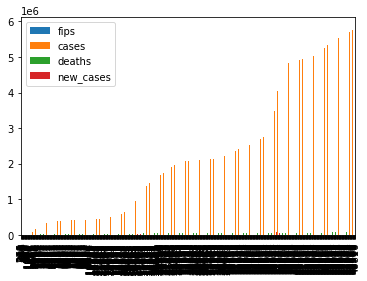

In [ ]:
ny_df.plot(kind='bar')

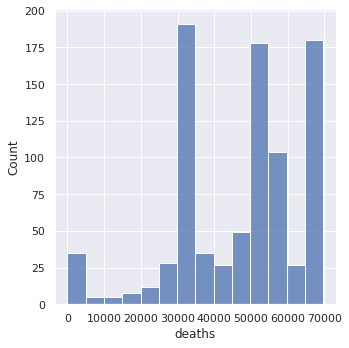

In [ ]:
# load packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
sns.displot(ny_df, x="deaths")

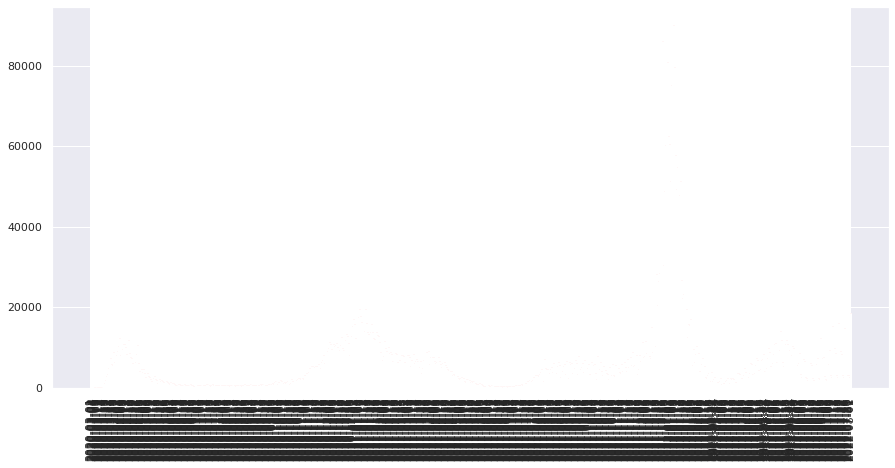

In [ ]:
plt.figure(figsize=(15,7))
plt.bar(x=ny_dates, height=ny_new_cases, color='red')
plt.xticks(rotation=90)
plt.show()

# Task4: Understand NY covid 19 data in last 30 days

In [ ]:
ny_cases_30 = ny_df['cases'][-31:-1]
ny_deaths_30 = ny_df['deaths'] [-31:-1]
ny_dates_30 = ny_df['date'][-31:-1]
ny_new_cases_30 = ny_df['new_cases'][-31:-1]

In [ ]:
# ny_dates_30

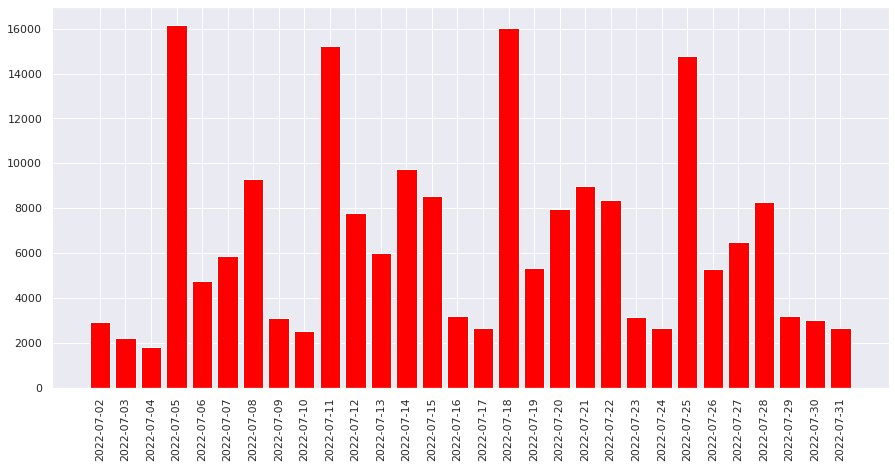

In [ ]:
plt.figure(figsize=(15,7))
plt.bar(x=ny_dates_30, height=ny_new_cases_30, color=('red'))
plt.xticks(rotation=90)
plt.show()

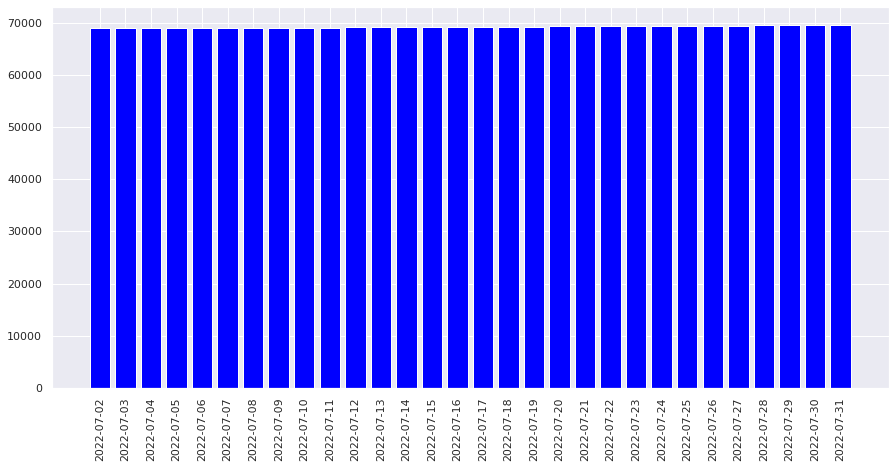

In [ ]:
plt.figure(figsize=(15,7))
plt.bar(x=ny_dates_30, height=ny_deaths_30, color='blue')
plt.xticks(rotation=90)
plt.show()

# Comparing Covid 19 data with different states

Let's compare the Covid 19 cases after July for states: New York, California, Florida, Texas, Arizona

In [ ]:
states = ['New York', 'California','Florida', 'Texas','Arizona']

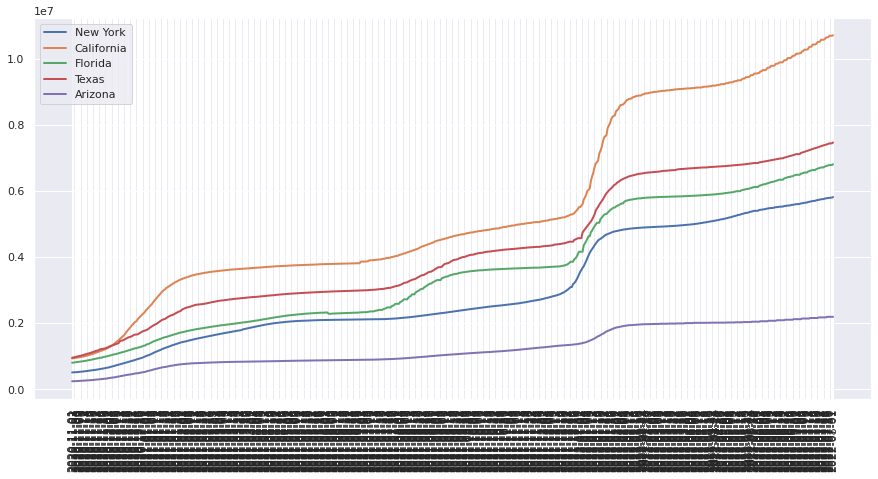

In [ ]:
plt.figure(figsize=(15,7))
for state in states:
  df_st = df[(df['state']==state) & (df['date']>='2020-11-01')]
  plt.plot(df_st['date'],
           df_st['cases'],
           linewidth=2
           )
  plt.xticks(rotation=90)
plt.legend(states)
plt.show()


# Conclusion

Below are the conclusions:



1.   Conclusion 1
     All cases for the five boroughs of New York City (New York, Kings, Queens, Bronx, and Richmond counties) are assigned to a single area called New York City. The number of deaths in New York City also includes probable deaths reported by the New York City health department. Deaths are reported by county of residence, except for certain periods described below.
2.   Conclusion 2
    The Coronavirus Resource Center temporarily displayed an incorrect increase in COVID-19 deaths and cases in the United States on Tuesday, April 5, due to the misplacement of Kentucky’s weekly totals into the daily update. The number of COVID-19 cases for New York City appeared to spike on March 24, 2021, because the figure incorporated unreported data from the previous day from all five boroughs. The impacts of this surge can be felt across the country, from California, where known cases are higher than they have been in almost six months, to New York, where more people with Covid are hospitalized today than at the height of last year's Delta wave





New York City saw a percipitious increase in Covid cases with countless outlier days with extremly high covid contraction rates. On a national level, California had the highest rates of infection amongst its population, followed by New York. There were countless errors during collection of the data that may have swayed the data in certain directions. 